<a href="https://colab.research.google.com/github/caio-olubini/Telco-Customer-Churn-Analysis/blob/main/Telco_Customer_Churn_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Navigation Index

*   [Data Import and Initial Cleaning](#scrollTo=Bmsx1BVtr80h)
*   [Data Exploration and Verification](#scrollTo=47416be6)
*   [Data Visualization - Churn vs. Features](#scrollTo=cde99354)
*   [Statistical Tests - Chi-square Test](#scrollTo=0d7d649f)
*   [Feature Engineering](#scrollTo=zsBR9eCPzjAd)
*   [Data Preprocessing](#scrollTo=8mmTaN7MTnYp)
*   [Model Training and Evaluation](#scrollTo=3fdfbf54)
*   [Analysis of Feature Relevance and Effect on Churn](#scrollTo=1ae9d618)
*   [Next Steps](#scrollTo=11a13762)

# Telco Customer Churn Classification Model



This notebook develops a classification model to predict customer churn using the Telco customer churn IBM dataset. Our goal is to identify key factors driving churn and build a predictive model to flag at-risk customers.

**Note:** This notebook has been developed with the assistance of a generative AI model.

Before getting started with the processing, lets take a look at the columns description. A fundamental part of data science modeling is actually understand the problem and the data!

**CustomerID**: A unique ID that identifies each customer.

**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# Data Import and Initial Cleaning

We begin by importing the dataset from Kaggle and performing some initial cleaning by dropping columns irrelevant to our modeling objective. We also convert the 'Total Charges' column to a numeric format, handling potential errors and missing values.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 27.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


In [2]:
import pandas as pd
import os

file_path = os.path.join(path, "Telco_customer_churn.xlsx")
df = pd.read_excel(file_path)

In [3]:
# Removing unecessary columns
df = df.drop(columns = ['CustomerID', 'Count', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Country', 'State', 'Churn Score', 'Churn Reason', 'CLTV', 'City'])

# Convert 'Total Charges' to numeric, coercing errors to NaN, then fill NaNs with 0 and convert to int
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1


# Data Exploration and Verification

This section focuses on understanding the data's structure, types, and identifying any immediate issues like missing values or outliers.

1.  **Examine Data Types and Missing Values**: We'll check the data types of each column and the count of non-null values to identify missing data.
2.  **Descriptive Statistics**: We'll generate summary statistics for numerical columns to understand their distribution.
3.  **Outlier Detection**: We'll use dispersion plots to visually inspect numerical features for potential outliers.

Let's start by examining the data types of each column and checking for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Next, we'll look at some descriptive statistics for the numerical columns.

In [5]:
display(df.describe())

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


And now, looking for possible outliers.

There are a couple of ways to look for outliers in the data, this time we choose to use dispersion plot which I consider to be pretty intuitive and effective.

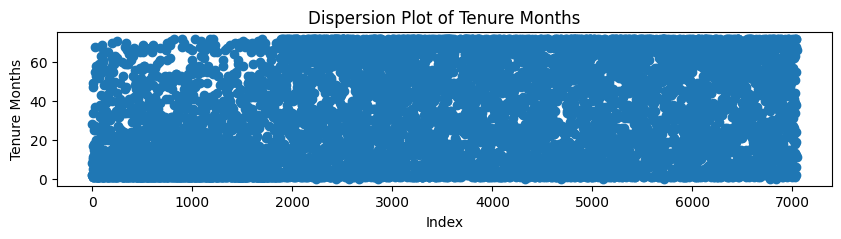

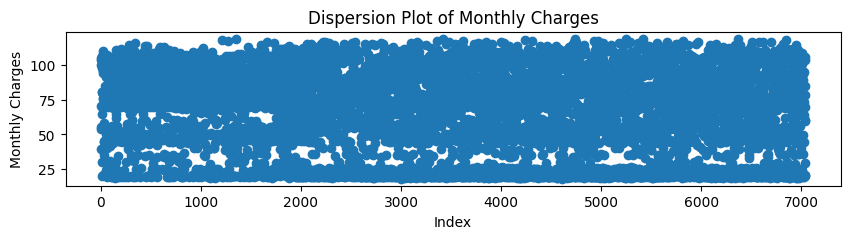

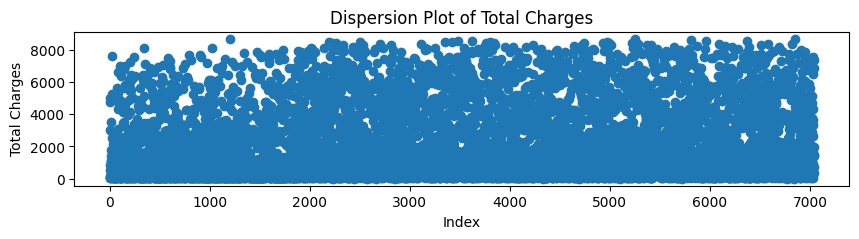

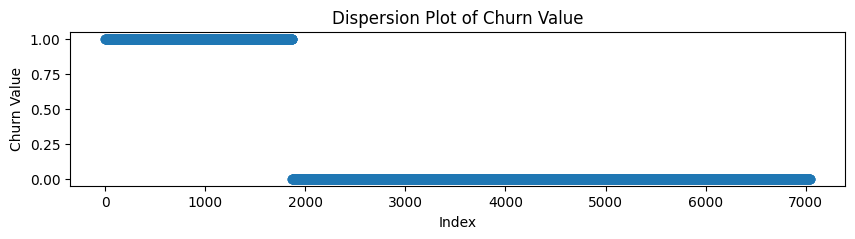

In [6]:
# prompt: create dispersion plot for numeric columns in order to identify outliers

import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for dispersion plots
numeric_cols = df.select_dtypes(include=np.number).columns

# Create dispersion plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 2))
    plt.scatter(df.index, df[col])
    plt.title(f'Dispersion Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

We could not identify any outliers among the numeric columns which seems to be very good!

## Data Visualization - Churn vs. Features

Here, we'll explore the relationship between individual features and the target variable, 'Churn Label'.

*   **Categorical Features**: We'll use bar plots to visualize the distribution of churn within each category.
*   **Numerical Features**: We'll use box plots to compare the distribution of numerical features for churned vs. non-churned customers.

Let's visualize some of the key features and their relationship with churn using seaborn.

In [7]:
# Identify columns to exclude
exclude_cols = ['Churn Label', 'Churn Value', 'Country', 'State', 'City', 'Zip Code']

# Get all columns except the excluded ones
remaining_cols = [col for col in df.columns if col not in exclude_cols]

# Separate into categorical and numerical lists
categorical_cols = df[remaining_cols].select_dtypes(include='object').columns.tolist()
numerical_cols = df[remaining_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
Numerical columns: ['Tenure Months', 'Monthly Charges', 'Total Charges']


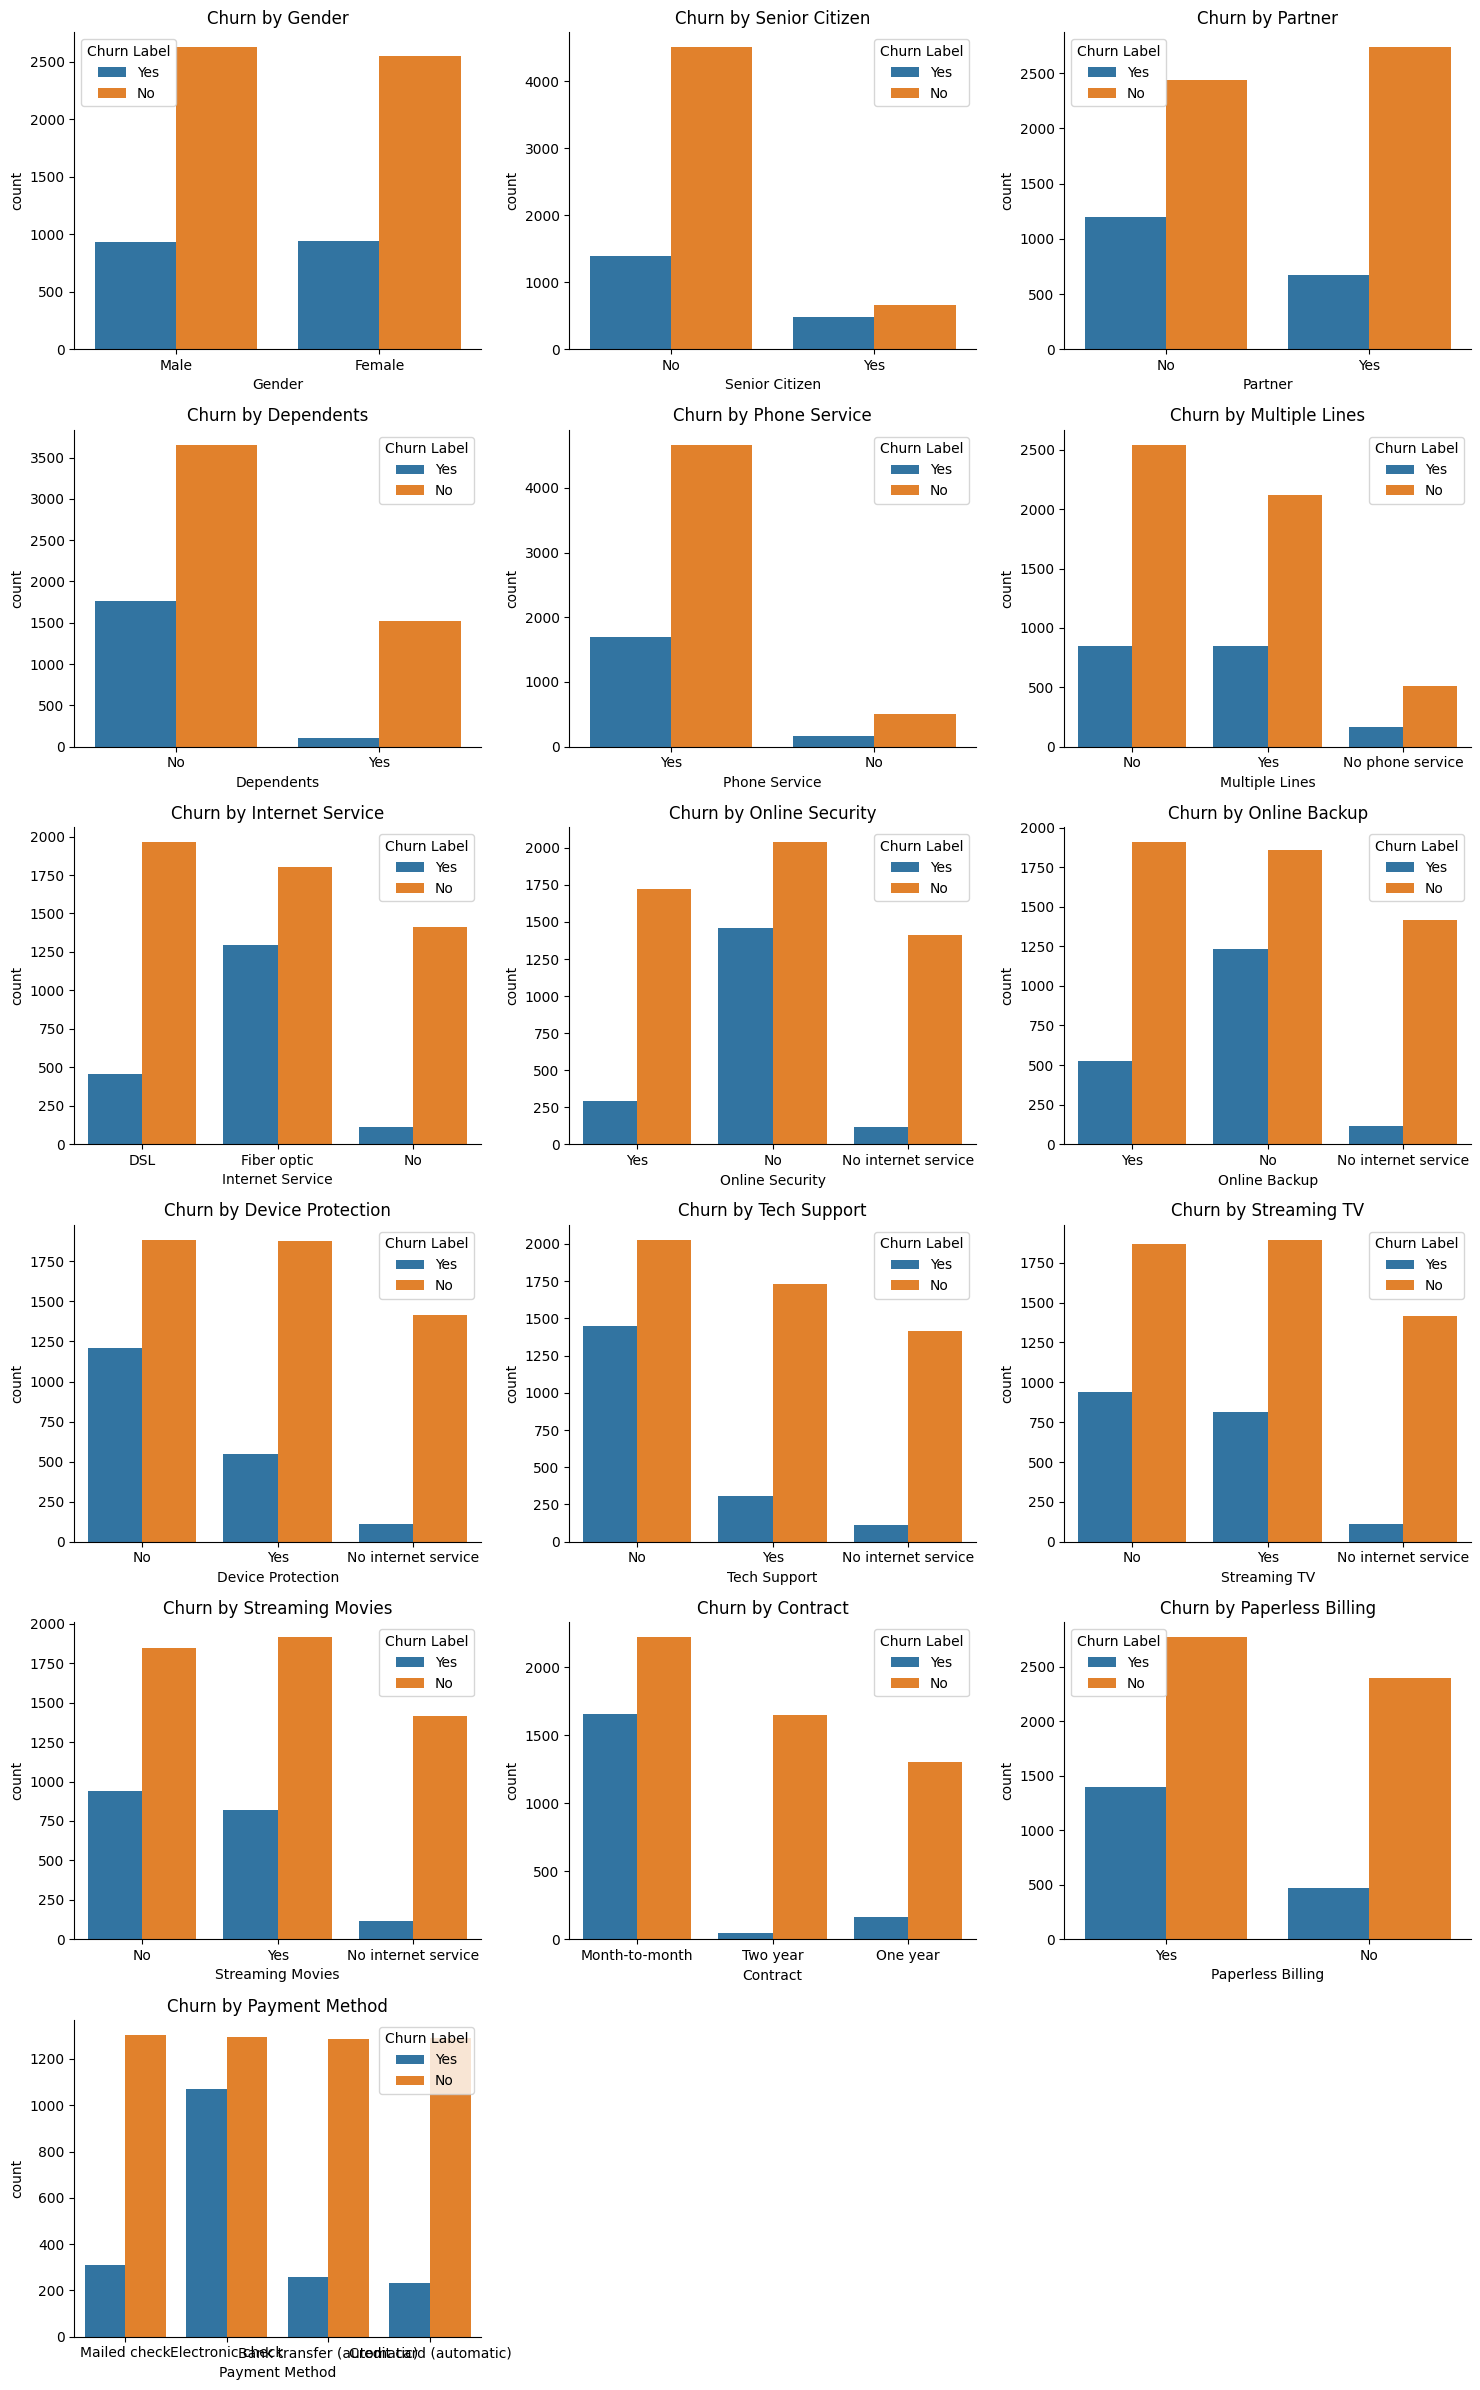

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of subplots needed
n_categorical_cols = len(categorical_cols)
n_cols = 3 # Number of columns in the subplot grid
n_rows = (n_categorical_cols + n_cols - 1) // n_cols # Calculate number of rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate through the categorical columns and create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn Label', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    sns.despine(ax=axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

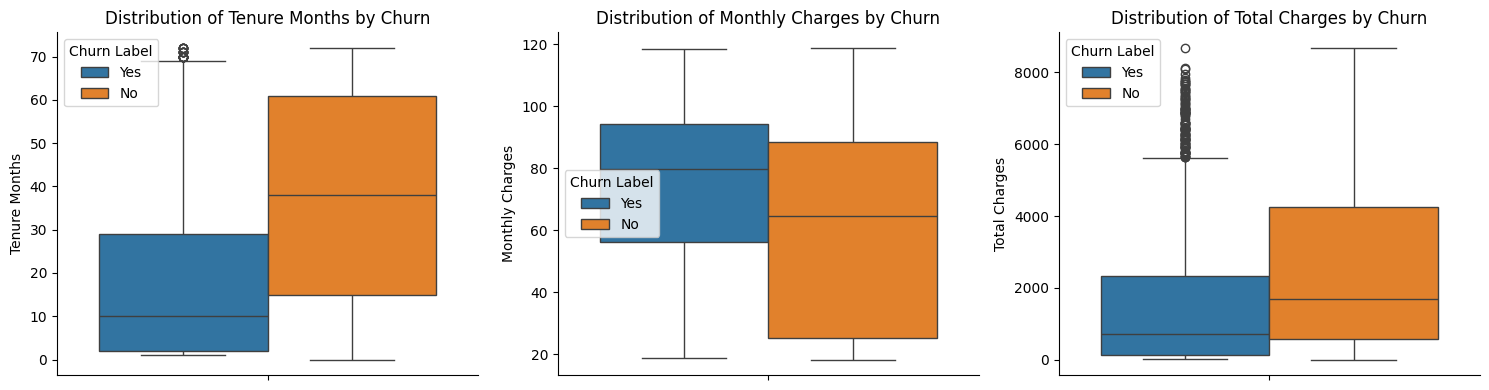

In [9]:
# Determine the number of subplots needed
n_numerical_cols = len(numerical_cols)
n_cols = 3 # Number of columns in the subplot grid
n_rows = (n_numerical_cols + n_cols - 1) // n_cols # Calculate number of rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate through the numerical columns and create histograms
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df,  y=col, hue='Churn Label', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    sns.despine(ax=axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Addicionaly, plotting perason correlation among numerical features.

That shows a strong positive correlation between Total Charges and Tenure Months, which was expected.


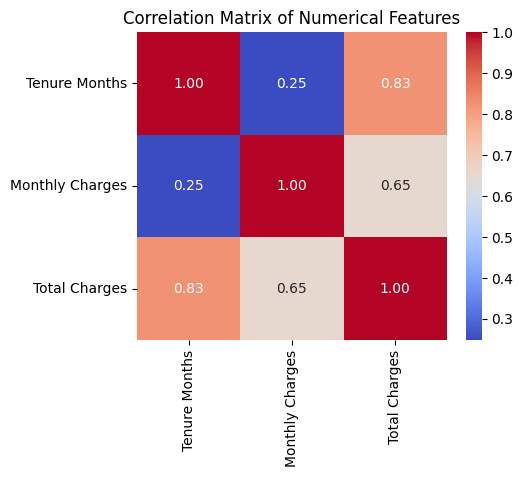

In [10]:
# prompt: sns heatmap correlation numeric columns

import matplotlib.pyplot as plt
# Correlation matrix for numerical columns
plt.figure(figsize=(5, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Statistical Tests - Chi-square Test

To statistically confirm the relationship between categorical variables and the target variable 'Churn Label', we'll perform a Chi-square test of independence. This test assesses whether there is a significant association between each categorical feature and churn.

In [11]:
from scipy.stats import chi2_contingency

categorical_cols_for_chi2 = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_chi2.remove('Churn Label')

chi2_stats = []
p_values = []
dof_list = []
expected_freqs = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn Label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p)
    dof_list.append(dof)
    expected_freqs.append(expected)

In [12]:
chi2_results = {
    'Feature': categorical_cols,
    'Chi-Square Statistic': chi2_stats,
    'P-value': p_values,
    'Degrees of Freedom': dof_list
}

chi2_results_df = pd.DataFrame(chi2_results)
display(chi2_results_df)

,Feature,Chi-Square Statistic,P-value,Degrees of Freedom
0,Gender,0.484083,4.865787e-01,1
1,Senior Citizen,159.426300,1.510067e-36,1
2,Partner,158.733382,2.139911e-36,1
3,Dependents,433.734379,2.500972e-96,1
4,Phone Service,0.915033,3.387825e-01,1
5,Multiple Lines,11.330441,3.464383e-03,2
6,Internet Service,732.309590,9.571788e-160,2
7,Online Security,849.998968,2.661150e-185,2
8,Online Backup,601.812790,2.079759e-131,2
9,Device Protection,558.419369,5.505219e-122,2


We calculate the Chi-square statistic and p-value for each categorical feature. A low p-value (typically < 0.05) indicates a statistically significant relationship with churn. Based on the results, most categorical variables appear to have a significant influence on churn, with the possible exceptions of 'Gender' and 'Phone Service'.

# Feature Engineering

In this section, we'll create new features from existing ones to potentially improve the model's predictive power and capture more complex relationships in the data. We'll implement a few engineering ideas to enrich the dataset.

In [13]:
import pandas as pd
import numpy as np
from typing import List

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Applies a feature engineering pipeline to the Telco Churn dataset.

    This function enriches the dataset by creating new, interpretable features.
    It assumes the input DataFrame is already cleaned of irrelevant columns
    (like IDs, geographic data, etc.).

    The pipeline consists of the following steps:
    1.  Creates new features based on existing ones:
        - 'PhoneServiceProfile': Consolidates phone service information.
        - 'FamilyProfile': Combines partner and dependent status.
        - 'TotalAdditionalServices': Counts extra services subscribed to.
        - 'MonthlyChargeVariation': Calculates the difference between the current
          monthly charge and the historical average.
        - 'TenureCategory': Buckets customers into lifecycle stages.
    2.  Drops the original columns that were used in transformations.

    Args:
        df (pd.DataFrame): The raw or partially cleaned Telco Churn DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame with engineered features, ready for modeling.
    """
    print("Starting feature engineering pipeline...")
    df_engineered = df.copy()

    # --- 1. Feature Creation ---
    print("  - Creating new features...")

    # 1.1: Consolidate Phone Service features
    # Create a single categorical feature for the customer's phone service status.
    phone_conditions = [
        (df_engineered['Phone Service'] == 'No'),
        (df_engineered['Phone Service'] == 'Yes') & (df_engineered['Multiple Lines'] == 'No'),
        (df_engineered['Phone Service'] == 'Yes') & (df_engineered['Multiple Lines'] == 'Yes')
    ]
    phone_choices = ['No_Phone_Service', 'Single_Line', 'Multiple_Lines']
    df_engineered['PhoneServiceProfile'] = np.select(phone_conditions, phone_choices, default='N/A')

    # 1.2: Create Family Profile
    # Combine partner and dependent status into a single lifestyle profile.
    family_conditions = [
        (df_engineered['Partner'] == 'No') & (df_engineered['Dependents'] == 'No'),
        (df_engineered['Partner'] == 'Yes') & (df_engineered['Dependents'] == 'No'),
        (df_engineered['Dependents'] == 'Yes')
    ]
    family_choices = ['Single', 'Couple_No_Dependents', 'With_Dependents']
    df_engineered['FamilyProfile'] = np.select(family_conditions, family_choices, default='N/A')

    # 1.3: Count Additional Services
    # Sum up the number of extra services to gauge customer engagement.
    additional_services_cols = [
        'Online Security', 'Online Backup', 'Device Protection',
        'Tech Support', 'Streaming TV', 'Streaming Movies'
    ]
    # Replace 'Yes' with 1 and all other values ('No', 'No internet service') with 0, then sum.
    df_engineered['TotalAdditionalServices'] = df_engineered[additional_services_cols].replace({'Yes': 1}).ne(1).sum(axis=1)


    # 1.4: Calculate Monthly Charge Variation
    # This feature can indicate recent price hikes or the end of promotions.
    # We calculate the historical average monthly charge and compare it to the current one.

    # First, ensure 'Total Charges' is a numeric type, as it may be an object.
    df_engineered['Total Charges'] = pd.to_numeric(df_engineered['Total Charges'], errors='coerce')
    # Fill NaN in 'Total Charges' (common for new customers) with 0 before calculation.
    df_engineered['Total Charges'] = df_engineered['Total Charges'].fillna(0)

    # Calculate historical average, avoiding division by zero for new customers.
    historical_avg_charge = (df_engineered['Total Charges'] / df_engineered['Tenure Months']).replace([np.inf, -np.inf], 0).fillna(0)
    df_engineered['MonthlyChargeVariation'] = df_engineered['Monthly Charges'] - historical_avg_charge

    # 1.5: Create Tenure Categories
    # Bucket tenure into meaningful customer lifecycle stages.
    tenure_bins = [-1, 12, 48, df_engineered['Tenure Months'].max() + 1]
    tenure_labels = ['New_Customer', 'Established_Customer', 'Loyal_Customer']
    df_engineered['TenureCategory'] = pd.cut(df_engineered['Tenure Months'], bins=tenure_bins, labels=tenure_labels)

    print("    - 'PhoneServiceProfile', 'FamilyProfile', 'TotalAdditionalServices', 'MonthlyChargeVariation', 'TenureCategory' created.")

    # --- 2. Final Cleanup ---
    # Drop the original columns that have been transformed into new features.
    original_cols_to_drop = [
        'Phone Service', 'Multiple Lines',
        'Partner', 'Dependents'
    ]
    df_engineered = df_engineered.drop(columns=original_cols_to_drop, errors='ignore')
    print(f"  - Dropped {len(original_cols_to_drop)} original columns after transformation.")

    print("Feature engineering pipeline finished successfully.\n")
    return df_engineered

In [14]:
df = feature_engineering(df)
extra_cols = ['PhoneServiceProfile', 'FamilyProfile', 'TotalAdditionalServices', 'MonthlyChargeVariation', 'TenureCategory']
extra_cols_numeric = ['TotalAdditionalServices', 'MonthlyChargeVariation']
extra_cols_categoric = [col for col in extra_cols if col not in extra_cols_numeric]
df[extra_cols].head()

Starting feature engineering pipeline...
  - Creating new features...
    - 'PhoneServiceProfile', 'FamilyProfile', 'TotalAdditionalServices', 'MonthlyChargeVariation', 'TenureCategory' created.
  - Dropped 4 original columns after transformation.
Feature engineering pipeline finished successfully.



,PhoneServiceProfile,FamilyProfile,TotalAdditionalServices,MonthlyChargeVariation,TenureCategory
0,Single_Line,Single,4,-0.225000,New_Customer
1,Single_Line,With_Dependents,6,-5.125000,New_Customer
2,Multiple_Lines,With_Dependents,3,-2.912500,New_Customer
3,Multiple_Lines,With_Dependents,2,-3.987500,Established_Customer
4,Multiple_Lines,With_Dependents,2,0.918367,Loyal_Customer


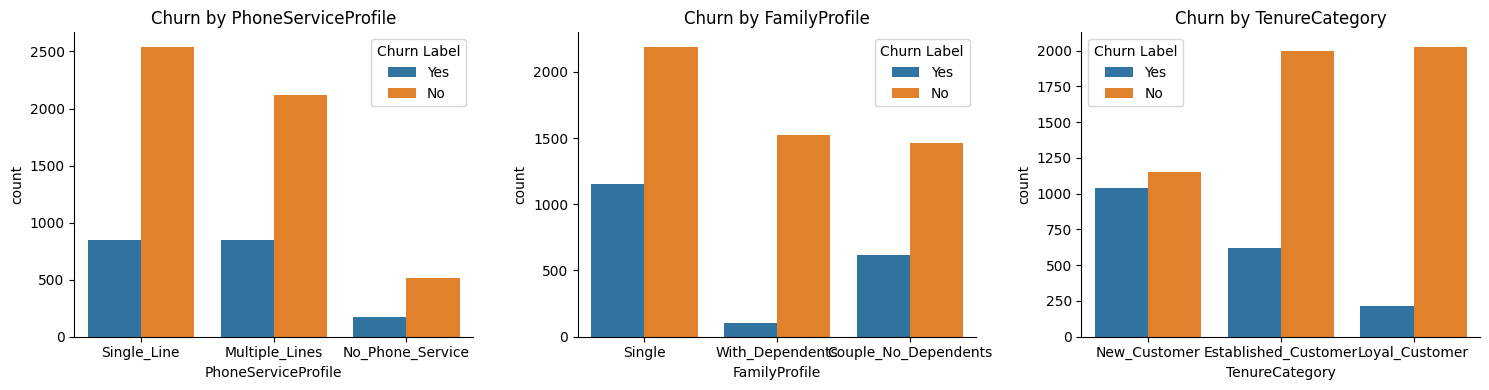

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of subplots needed
n_categorical_cols = len(extra_cols_categoric)
n_cols = 3 # Number of columns in the subplot grid
n_rows = (n_categorical_cols + n_cols - 1) // n_cols # Calculate number of rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate through the categorical columns and create count plots
for i, col in enumerate(extra_cols_categoric):
    sns.countplot(x=col, hue='Churn Label', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    sns.despine(ax=axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Preprocessing

This crucial step prepares the data for machine learning models. It involves encoding categorical features into a numerical format and scaling numerical features to ensure they have a similar range, which can improve model performance.

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
from typing import Tuple, List

def preprocess_telco_data(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Applies a comprehensive preprocessing pipeline to the Telco Churn dataset.

    This function performs the following steps:
    1. Identifies categorical and numerical features (excluding the target).
    2. Separates binary categorical features and encodes them into a single column (0/1).
    3. Applies one-hot encoding to multi-class categorical features.
    4. Applies standard scaling to numerical features.
    5. Combines the processed categorical and numerical features.
    6. Separates the target variable ('Churn Value').

    Args:
        df (pd.DataFrame): The input Telco Churn DataFrame, potentially
                           including the target variable and features
                           before preprocessing.

    Returns:
        Tuple[pd.DataFrame, pd.Series]: A tuple containing:
            - pd.DataFrame: The processed features DataFrame ready for model training.
            - pd.Series: The target variable Series.
    """
    print("Starting data preprocessing pipeline...")

    df_processed = df.copy()

    # 1. Identify Feature Types
    categorical_features = df_processed.select_dtypes(include='object').columns.tolist()
    # Ensure 'Churn Label' is excluded if it exists and 'Churn Value' is the target
    if 'Churn Label' in categorical_features:
        categorical_features.remove('Churn Label')

    numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()
    # Ensure 'Churn Value' is excluded from numerical features
    if 'Churn Value' in numerical_features:
        numerical_features.remove('Churn Value')

    print(f"  - Identified {len(categorical_features)} categorical and {len(numerical_features)} numerical features.")

    # Separate binary and multi-class categorical features
    binary_categorical_features = [col for col in categorical_features if df_processed[col].nunique() == 2]
    multiclass_categorical_features = [col for col in categorical_features if df_processed[col].nunique() > 2]

    print(f"  - Identified {len(binary_categorical_features)} binary and {len(multiclass_categorical_features)} multi-class categorical features.")

    # 2. Encode Binary Categorical Features (to 0 and 1)
    df_binary_encoded = pd.DataFrame(index=df_processed.index)
    if binary_categorical_features:
        print("  - Encoding binary categorical features...")
        for col in binary_categorical_features:
            # Assuming the first unique value is mapped to 0 and the second to 1
            # You might want to explicitly define the mapping based on domain knowledge
            unique_values = df_processed[col].unique()
            if len(unique_values) == 2:
                 # Map 'No' or similar to 0, and 'Yes' or similar to 1.
                 # This is a common convention, adjust if your data requires a different mapping.
                 mapping = {unique_values[0]: 0, unique_values[1]: 1}
                 # A more robust approach might involve checking for 'Yes'/'No' or similar patterns.
                 # For this dataset, a simple mapping of the two unique values is likely sufficient.
                 if 'No' in unique_values and 'Yes' in unique_values:
                     mapping = {'No': 0, 'Yes': 1}
                 elif 'No internet service' in unique_values and 'Yes' in unique_values:
                      mapping = {'No internet service': 0, 'Yes': 1}
                 elif 'No phone service' in unique_values and 'Yes' in unique_values:
                      mapping = {'No phone service': 0, 'Yes': 1}
                 elif 'Female' in unique_values and 'Male' in unique_values:
                      mapping = {'Female': 0, 'Male': 1}
                 else:
                     # Default mapping if no common pattern is found
                     mapping = {unique_values[0]: 0, unique_values[1]: 1}

                 df_binary_encoded[col] = df_processed[col].map(mapping)
            else:
                 # Handle cases where a column identified as binary doesn't have exactly two unique values after all
                 print(f"Warning: Column '{col}' does not have exactly 2 unique values for binary encoding.")
        print(f"    - Created {df_binary_encoded.shape[1]} encoded binary features.")


    # 3. One-Hot Encode Multi-Class Categorical Features
    df_multiclass_encoded = pd.DataFrame(index=df_processed.index)
    if multiclass_categorical_features: # Only encode if there are multi-class categorical features
        print("  - Applying One-Hot Encoding to multi-class features...")
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        df_multiclass_encoded = encoder.fit_transform(df_processed[multiclass_categorical_features])
        df_multiclass_encoded = pd.DataFrame(df_multiclass_encoded, columns=encoder.get_feature_names_out(multiclass_categorical_features))
        print(f"    - Created {df_multiclass_encoded.shape[1]} encoded multi-class categorical features.")


    # 4. Standard Scale Numerical Features
    df_numerical_scaled = pd.DataFrame(index=df_processed.index)
    if numerical_features: # Only scale if there are numerical features
        print("  - Applying Standard Scaling...")
        scaler = StandardScaler()
        df_numerical_scaled = scaler.fit_transform(df_processed[numerical_features])
        df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_features)
        print(f"    - Scaled {df_numerical_scaled.shape[1]} numerical features.")


    # 5. Combine Processed Features
    print("  - Combining processed features...")
    df_processed_features = pd.concat([df_binary_encoded, df_multiclass_encoded, df_numerical_scaled], axis=1)
    print(f"    - Combined DataFrame shape: {df_processed_features.shape}")

    # 6. Prepare Target Variable
    print("  - Separating target variable...")
    y = None
    if 'Churn Value' in df.columns:
        y = df['Churn Value']
        print("    - Target variable 'Churn Value' extracted.")
    else:
         print("Warning: 'Churn Value' column not found in the DataFrame.")

    print("Data preprocessing pipeline finished successfully.\n")

    return df_processed_features, y

In [17]:
# Apply the preprocessing function to the DataFrame
X_processed, y = preprocess_telco_data(df)

# Display the head of the processed features and target variable
print("Processed Features (X_processed) Head:")
display(X_processed.head())

Starting data preprocessing pipeline...
  - Identified 14 categorical and 5 numerical features.
  - Identified 3 binary and 11 multi-class categorical features.
  - Encoding binary categorical features...
    - Created 3 encoded binary features.
  - Applying One-Hot Encoding to multi-class features...
    - Created 34 encoded multi-class categorical features.
  - Applying Standard Scaling...
    - Scaled 5 numerical features.
  - Combining processed features...
    - Combined DataFrame shape: (7043, 42)
  - Separating target variable...
    - Target variable 'Churn Value' extracted.
Data preprocessing pipeline finished successfully.

Processed Features (X_processed) Head:


,Gender,Senior Citizen,Paperless Billing,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,...,PhoneServiceProfile_No_Phone_Service,PhoneServiceProfile_Single_Line,FamilyProfile_Couple_No_Dependents,FamilyProfile_Single,FamilyProfile_With_Dependents,Tenure Months,Monthly Charges,Total Charges,TotalAdditionalServices,MonthlyChargeVariation
0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-1.236724,-0.362660,-0.958066,0.020519,-0.089823
1,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.236724,0.197365,-0.938874,1.103033,-1.615549
2,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.992402,1.159546,-0.643789,-0.520738,-0.926637
3,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.177995,1.330711,0.338085,-1.061995,-1.261362
4,1,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.677133,1.294151,1.216150,-1.061995,0.266190


# Model Training and Evaluation

Now that our data is prepared, it's time to train a classification model and evaluate its performance. We will use Logistic Regression as our initial model and evaluate it using cross-validation.

## Import libraries



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

## Defining evaluation function

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from typing import Any, Tuple

def evaluate_model_cv(model: Any,
                      X: pd.DataFrame,
                      y: pd.Series,
                      cv_strategy: Any) -> Tuple[Any, pd.DataFrame]:
    """
    Robustly evaluates a classification model using cross-validation, returning
    both training and testing scores (Accuracy, F1-Score, and ROC AUC) and the
    model trained on the last fold.

    This function helps diagnose overfitting by comparing training and test metrics.
    It iterates manually through folds to handle exceptions in ROC AUC calculation.

    Args:
        model (Any): An sklearn-compatible classification model instance.
        X (pd.DataFrame): The feature set.
        y (pd.Series): The target variable.
        cv_strategy (Any): A cross-validation strategy instance (e.g., StratifiedKFold()).

    Returns:
        Tuple[Any, pd.DataFrame]: A tuple containing:
            - Any: The model instance trained on the last cross-validation fold.
            - pd.DataFrame: A DataFrame with the mean and standard deviation of
                            the training and testing metrics across all folds.
    """
    print("--- Starting Cross-Validation (Train & Test) ---")

    # Dictionaries to store metrics for each fold
    metrics = {
        'train_accuracy': [], 'test_accuracy': [],
        'train_f1': [], 'test_f1': [],
        'train_roc_auc': [], 'test_roc_auc': []
    }

    last_fold_model = None

    for fold, (train_index, test_index) in enumerate(cv_strategy.split(X, y)):
        # 1. Split data into training and testing for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 2. Train the model
        model.fit(X_train, y_train)
        last_fold_model = model

        # 3. Make predictions and get probabilities for train and test sets
        y_pred_train = model.predict(X_train)
        y_proba_train = model.predict_proba(X_train)[:, 1]

        y_pred_test = model.predict(X_test)
        y_proba_test = model.predict_proba(X_test)[:, 1]

        # 4. Calculate training metrics
        metrics['train_accuracy'].append(accuracy_score(y_train, y_pred_train))
        metrics['train_f1'].append(f1_score(y_train, y_pred_train, average='weighted'))
        metrics['train_roc_auc'].append(roc_auc_score(y_train, y_proba_train))

        # 5. Calculate test metrics (with error handling for ROC AUC)
        metrics['test_accuracy'].append(accuracy_score(y_test, y_pred_test))
        metrics['test_f1'].append(f1_score(y_test, y_pred_test, average='weighted'))
        try:
            metrics['test_roc_auc'].append(roc_auc_score(y_test, y_proba_test))
        except ValueError as e:
            # This exception occurs if y_test contains only one class
            print(f"WARNING [Fold {fold+1}]: Could not calculate test ROC AUC. Error: {e}")
            metrics['test_roc_auc'].append(np.nan)

    # 6. Create a summary DataFrame with mean and standard deviation
    summary_data = {
        'Metric': ['Accuracy', 'F1-Score (Weighted)', 'ROC AUC'],
        'Train Mean': [
            np.mean(metrics['train_accuracy']),
            np.mean(metrics['train_f1']),
            np.mean(metrics['train_roc_auc'])
        ],
        'Train Std': [
            np.std(metrics['train_accuracy']),
            np.std(metrics['train_f1']),
            np.std(metrics['train_roc_auc'])
        ],
        'Test Mean': [
            np.nanmean(metrics['test_accuracy']),
            np.nanmean(metrics['test_f1']),
            np.nanmean(metrics['test_roc_auc'])
        ],
        'Test Std': [
            np.nanstd(metrics['test_accuracy']),
            np.nanstd(metrics['test_f1']),
            np.nanstd(metrics['test_roc_auc'])
        ]
    }
    results_df = pd.DataFrame(summary_data)

    print("\n--- Evaluation Finished ---")
    return last_fold_model, results_df.round(4)

## Logistic Regression

### Initialize model and cross-validation

In [19]:
# 1. Instantiate a LogisticRegression model
model = LogisticRegression(random_state=42)

# 2. Instantiate a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Perform cross-validation


In [21]:
model = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, C = 0.1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

trained_model, results = evaluate_model_cv(model=model, X=X_processed, y=y, cv_strategy=cv)
results

--- Starting Cross-Validation (Train & Test) ---

--- Evaluation Finished ---


,Metric,Train Mean,Train Std,Test Mean,Test Std
0,Accuracy,0.7581,0.0030,0.7566,0.0094
1,F1-Score (Weighted),0.7707,0.0028,0.7692,0.0090
2,ROC AUC,0.8598,0.0021,0.8576,0.0094


In [22]:
feature_names = X_processed.columns

# Get the coefficients from the trained model
# Logistic regression coefficients are stored in the 'coef_' attribute
# For binary classification, coef_ has shape (1, n_features)
coefficients = trained_model.coef_[0]

# Create a DataFrame to display feature names and their coefficients
feature_weights = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficient to see most influential features
feature_weights['Absolute_Coefficient'] = abs(feature_weights['Coefficient'])
feature_weights = feature_weights.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nFeature Weights from the last fold's trained model:")
display(feature_weights)


Feature Weights from the last fold's trained model:


,Feature,Coefficient,Absolute_Coefficient
36,FamilyProfile_With_Dependents,-1.416843,1.416843
37,Tenure Months,-1.015739,1.015739
26,Contract_Two year,-0.812444,0.812444
38,Monthly Charges,0.603684,0.603684
24,Contract_Month-to-month,0.482145,0.482145
17,Tech Support_Yes,-0.368127,0.368127
33,PhoneServiceProfile_Single_Line,-0.347009,0.347009
29,Payment Method_Electronic check,0.330522,0.330522
32,PhoneServiceProfile_No_Phone_Service,0.309482,0.309482
39,Total Charges,0.267311,0.267311


## XGBoosting

In [49]:
import xgboost as xgb

# Initialize XGBoost Classifier model
model = xgb.XGBClassifier(objective='binary:logistic',
                          max_depth = 3,
                          min_child_weight = 5,
                          subsample = 0.6,
                          colsample_bytree = 0.6,
                          eta = 0.1,
                          gamma = 0.5,
                          reg_lambda = 10,
                          random_state=42)

# Initialize a StratifiedKFold object (same as before)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
trained_model_xgb, results_xgb = evaluate_model_cv(model=model, X=X_processed, y=y, cv_strategy=cv)
results_xgb


--- Starting Cross-Validation (Train & Test) ---

--- Evaluation Finished ---


,Metric,Train Mean,Train Std,Test Mean,Test Std
0,Accuracy,0.8262,0.0021,0.8105,0.0075
1,F1-Score (Weighted),0.8213,0.0021,0.8049,0.0078
2,ROC AUC,0.8821,0.0015,0.8638,0.0061


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
model = RandomForestClassifier(n_estimators = 300,
                               max_depth=6,
                               min_samples_split=12,
                               min_samples_leaf=10,
                               random_state=42)

# Initialize a StratifiedKFold object (same as before)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
trained_model_rf, results_rf = evaluate_model_cv(model=model, X=X_processed, y=y, cv_strategy=cv)
results_rf


--- Starting Cross-Validation (Train & Test) ---

--- Evaluation Finished ---


,Metric,Train Mean,Train Std,Test Mean,Test Std
0,Accuracy,0.8158,0.0011,0.8036,0.0045
1,F1-Score (Weighted),0.8056,0.0022,0.7921,0.0048
2,ROC AUC,0.8754,0.0015,0.8566,0.0076


## Analysis of Feature Relevance and Effect on Churn

Based on the Logistic Regression model trained with L1 regularization, we can examine the coefficients of each feature to understand its relevance and impact on the likelihood of customer churn. The absolute magnitude of the coefficient indicates the strength of the relationship, while the sign (positive or negative) indicates the direction of the relationship. A positive coefficient suggests that as the feature value increases, the likelihood of churn increases (holding other features constant). A negative coefficient suggests that as the feature value increases, the likelihood of churn decreases.

Looking at the `feature_weights` DataFrame, which is sorted by the absolute value of the coefficients in descending order, we can identify the most influential features:

*   **Dependents (Coefficient: -1.37):** This feature has the largest absolute coefficient and a negative sign. This suggests that customers with dependents are significantly less likely to churn compared to those without dependents. This aligns with the intuition that customers with families might be more tied to their service provider.

*   **Tenure Months (Coefficient: -0.99):** Tenure also has a strong negative coefficient. This indicates that the longer a customer stays with the company, the less likely they are to churn. This is a common finding in churn analysis, as loyal customers with longer tenure tend to be more stable.

*   **Contract_Month-to-month (Coefficient: 0.74):** This feature has a large positive coefficient. This implies that customers on a month-to-month contract are significantly more likely to churn compared to those on longer-term contracts (one or two year). This is expected, as month-to-month contracts offer greater flexibility to switch providers.

*   **Phone Service (Coefficient: -0.73):** This feature has a negative coefficient, suggesting that having phone service makes customers less likely to churn.

*   **Monthly Charges (Coefficient: 0.73):** This feature has a strong positive coefficient, indicating that higher monthly charges are associated with a higher likelihood of churn. This is intuitive, as customers with higher bills might be more sensitive to pricing and more likely to seek cheaper alternatives.

*   **Contract_Two year (Coefficient: -0.56):** This feature has a strong negative coefficient, suggesting that customers on a two-year contract are much less likely to churn compared to those on month-to-month contracts. This reinforces the importance of contract length in retaining customers.

*   **Tech Support_Yes (Coefficient: -0.39):** Having technical support has a negative coefficient, indicating that customers who subscribe to tech support are less likely to churn. This suggests that good support contributes to customer satisfaction and retention.

*   **Online Security_Yes (Coefficient: -0.39):** Similar to tech support, having online security also has a negative coefficient, suggesting it helps in retaining customers.

Other features like `Payment Method_Electronic check` and `Total Charges` also show some influence, though their coefficients are smaller in magnitude compared to the top features. Features with coefficients close to zero (like `Gender`, `Internet Service_Fiber optic`, `Internet Service_DSL`, `Payment Method_Mailed check`, and many of the "No internet service" or "No phone service" related encoded features) have minimal impact on the churn prediction in this model.

In summary, the most relevant factors influencing churn according to this model are customer tenure, contract type, whether the customer has dependents, and the monthly charges. Providing longer-term contract options, incentivizing customers to stay longer, and potentially reviewing pricing for high-charge customers could be important strategies for reducing churn.

# Next Steps

Here are some potential next steps to further improve our churn prediction model:

*   **Hyperparameter Tuning:** Optimize the hyperparameters of the current Logistic Regression model or other models using techniques like GridSearchCV or RandomizedSearchCV.
*   **Experiment with Different Models:** Explore other classification algorithms such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Support Vector Machines.
*   **Address Class Imbalance:** Investigate techniques like oversampling (e.g., SMOTE) or undersampling to handle the potential class imbalance in the dataset, as churned customers are often a minority class.